In [ ]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the Data

In [ ]:
df = pd.read_csv('/content/wines_SPA.csv')
df.head()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
ml_df = df

In [ ]:
ml_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


##**Shape**

In [ ]:
ml_df.shape

(7500, 11)

##**Duplicate**

In [ ]:
ml_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7495     True
7496     True
7497     True
7498     True
7499     True
Length: 7500, dtype: bool

In [ ]:
ml_df.duplicated().sum()

5452

In [ ]:
# Remove duplicates
ml_df = df.drop_duplicates()
ml_df.duplicated().sum()

0

##**Remove Unnecessary columns**


In [ ]:
ml_df = df.drop(columns=['country'])
ml_df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# The only reason why i drop the country's column is we know that this dataset is about Spanish wine 

##**Identify missing values**

In [ ]:
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [ ]:
ml_df['wine']

0                 Tinto
1         Vina El Pison
2                 Unico
3                 Unico
4                 Unico
             ...       
7495            Reserva
7496      Les Brugueres
7497    Finca Terrerazo
7498       Gran Reserva
7499           Preludio
Name: wine, Length: 7500, dtype: object

In [ ]:
ml_df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

#Inconsitancies

In [ ]:
ml_df['winery'].value_counts()

Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64

In [ ]:
ml_df['wine'].value_counts()

Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64

In [ ]:
ml_df['year'].value_counts()

2011    1190
2016     897
2015     860
2018     850
2017     731
        ... 
1953       1
1972       1
1974       1
1931       1
1925       1
Name: year, Length: 71, dtype: int64

In [ ]:
ml_df['rating'].value_counts()

4.2    5679
4.3     707
4.4     484
4.5     281
4.6     191
4.7     112
4.8      44
4.9       2
Name: rating, dtype: int64

In [ ]:
ml_df['num_reviews'].value_counts()

420     881
410     662
404     441
390     440
405     222
       ... 
966       1
1018      1
1039      1
1047      1
746       1
Name: num_reviews, Length: 817, dtype: int64

In [ ]:
ml_df['region'].value_counts()

Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: region, Length: 76, dtype: int64

In [ ]:
ml_df['price'].value_counts()

37.90     228
18.90     226
45.00     225
19.90     224
17.90     223
         ... 
47.52       1
919.60      1
94.20       1
39.35       1
995.00      1
Name: price, Length: 1292, dtype: int64

In [ ]:
ml_df['type'].value_counts()

Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: type, dtype: int64

In [ ]:
ml_df['body'].value_counts()

4.0    4120
5.0    1624
3.0     553
2.0      34
Name: body, dtype: int64

In [ ]:
ml_df['acidity'].value_counts()

3.0    6028
2.0     268
1.0      35
Name: acidity, dtype: int64

##Preprocessing

In [ ]:
#  Train Test Split prep

X = ml_df.drop(columns= 'acidity')
y = ml_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
y_train.value_counts(normalize= True)

19.980000      0.032356
11.950000      0.032000
17.500000      0.031289
37.900000      0.030933
48.960000      0.030756
                 ...   
53.800000      0.000178
30.887605      0.000178
33.230000      0.000178
555.200000     0.000178
1113.200000    0.000178
Name: price, Length: 1033, dtype: float64

In [ ]:
# Funciton for barplot

def plot_bar(data,x, y, figsize=(20,5)):
    # size for the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    
    # sns for barplopt

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'body{y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'rating', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('body', fontsize = 15, fontweight = 'bold')

    return fig,ax
     

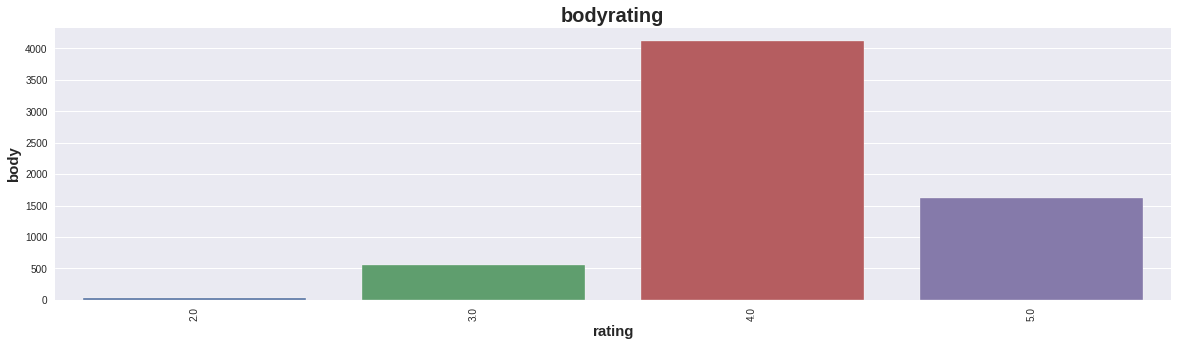

In [ ]:
fig, ax = plot_bar(df, 'body','rating');


In [ ]:
# I used the barplot just for observation of rating.

#UNIVARIATE SCATTER PLOT

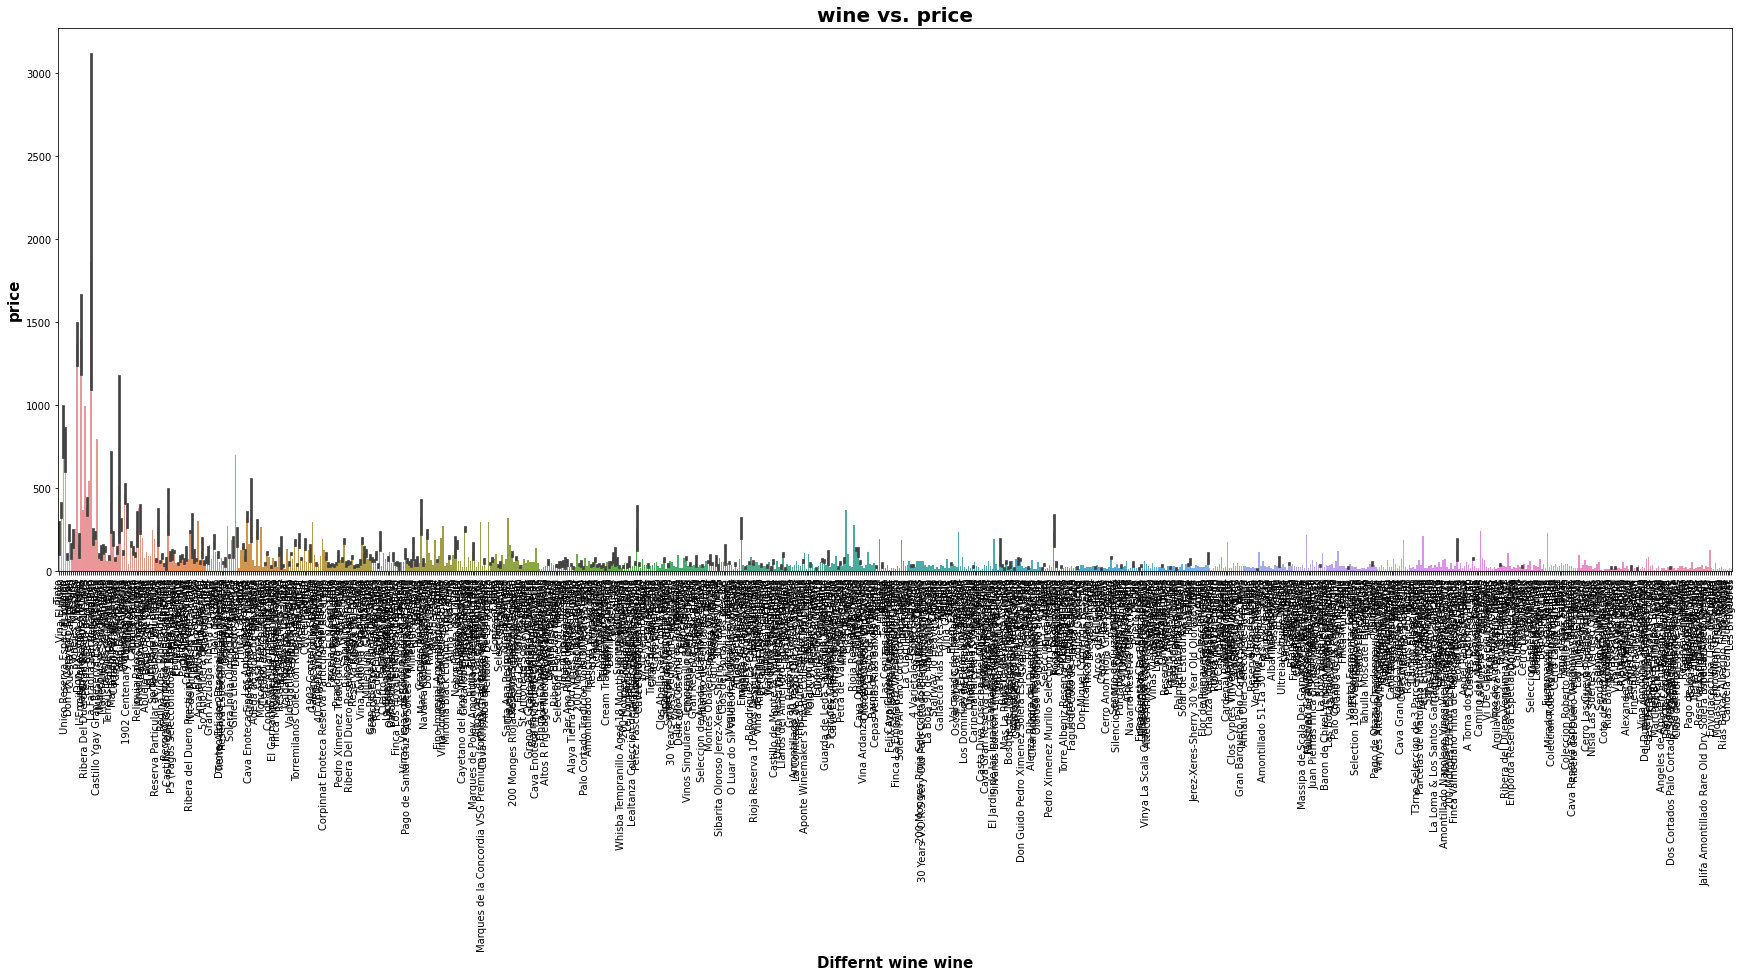

In [ ]:
#wine
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='wine', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('wine vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Differnt wine wine', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# based on the plot bar we could ecognizer the distubation of wine with differnt prices.

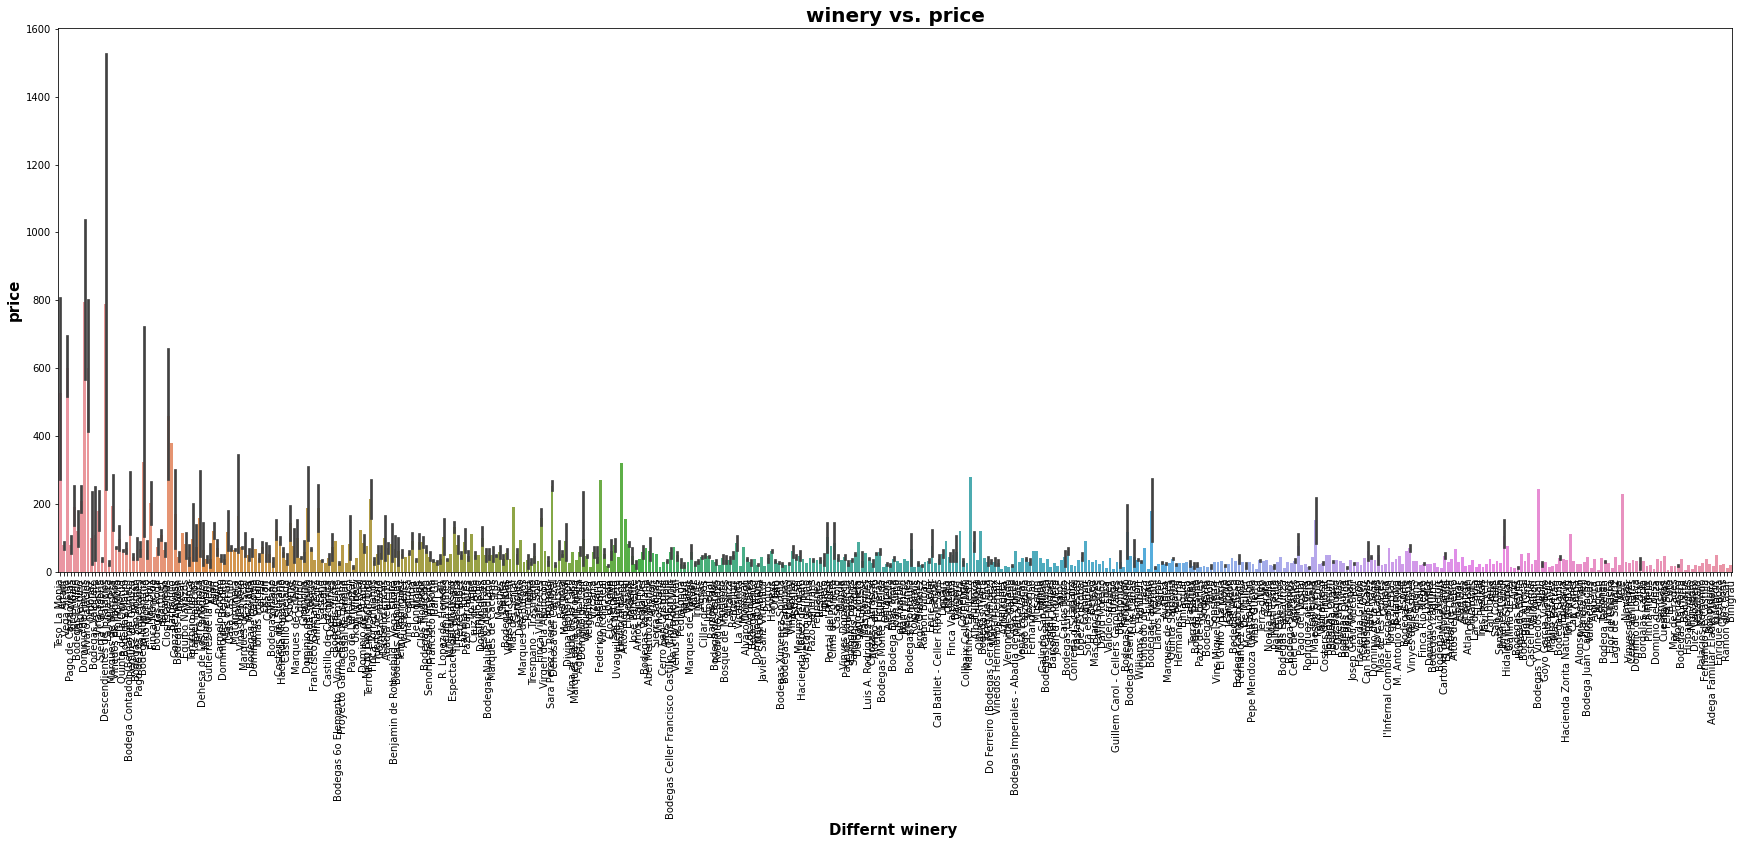

In [ ]:
#winary
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='winery', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('winery vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Differnt winery ', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# According to the graph, we are able to figure out different wineries.

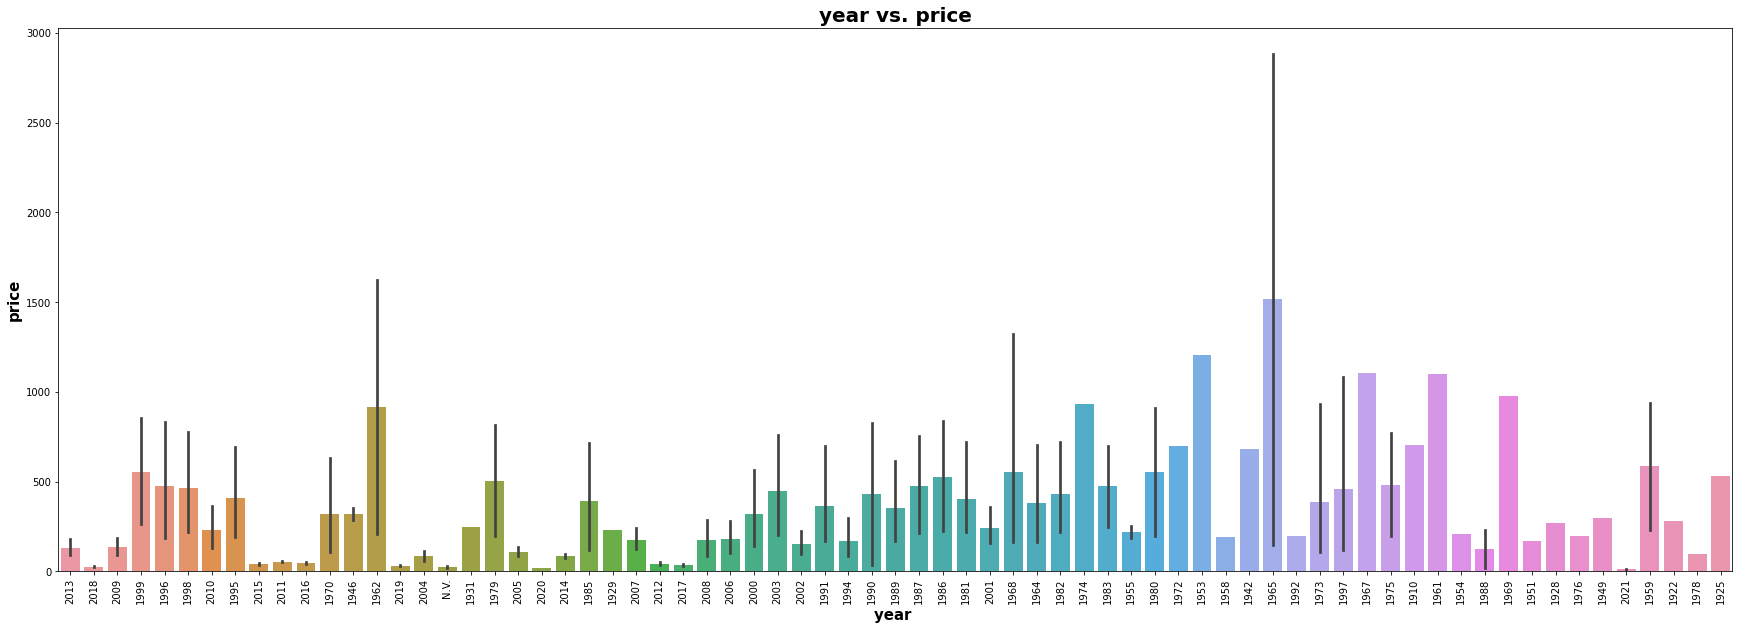

In [ ]:
#Year
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='year', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('year vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('year ', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# Based on our graph, we could say the wine from 1995 is the most expensive one.

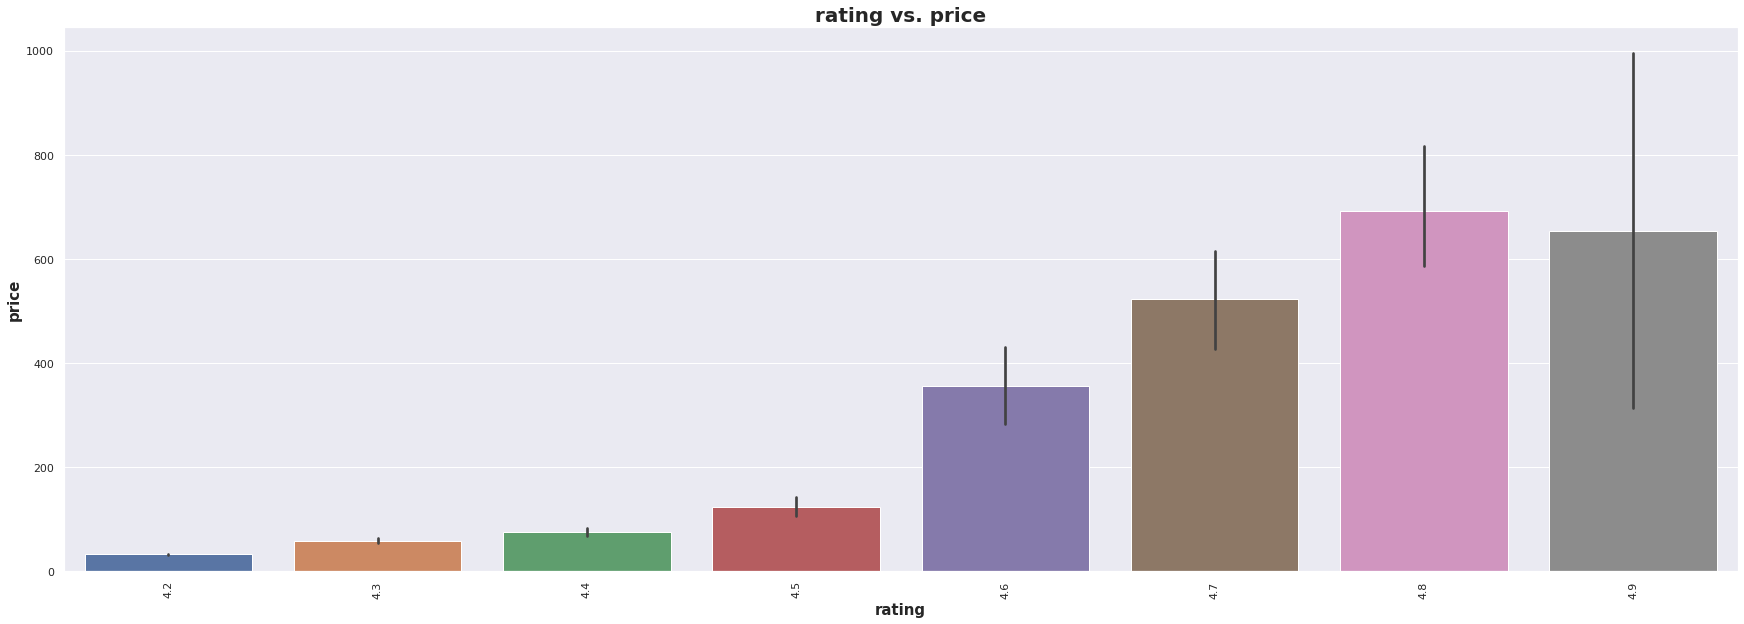

In [ ]:
#rating
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='rating', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('rating vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('rating', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# AS always, the expensive one has a better rating, as we have in out bar plot

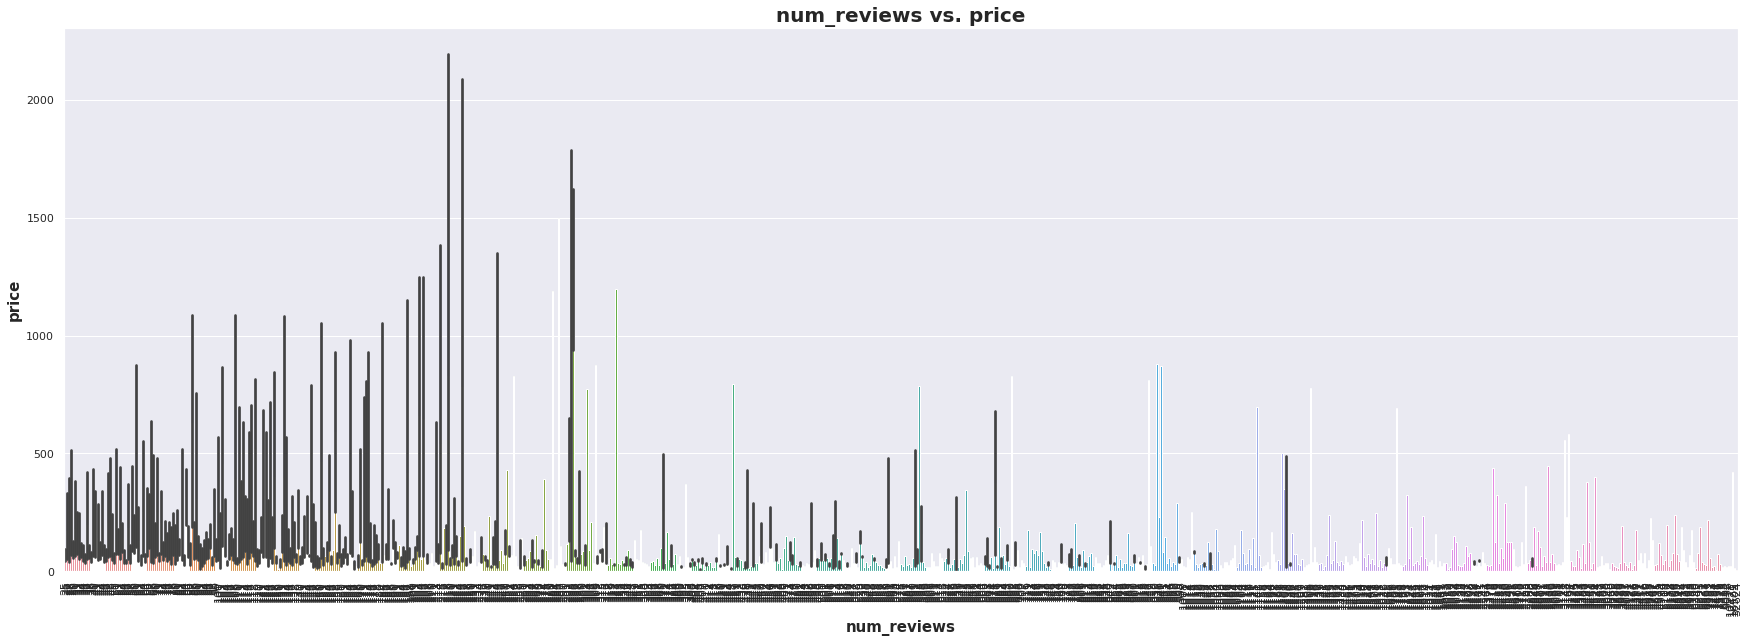

In [ ]:
#num_reviews
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='num_reviews', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('num_reviews vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('num_reviews', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# unfortunaly it is very hard to read number of revies based on this graph

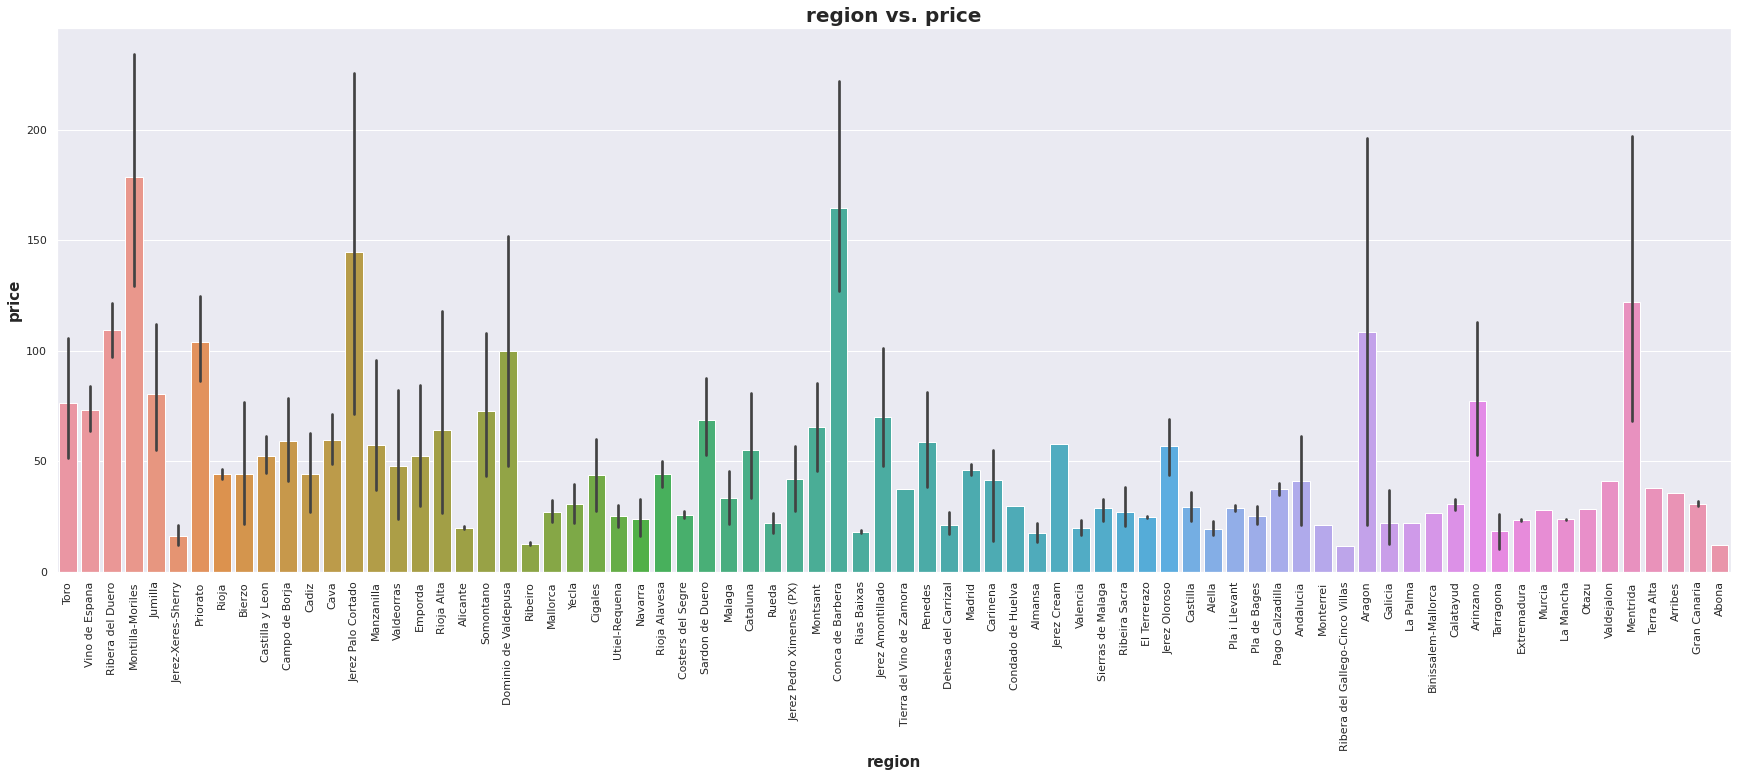

In [ ]:
#region
#num_reviews
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='region', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('region vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('region', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# Up to this graph the most expenisve wine  is from montilla monie, the jerez palo cottada

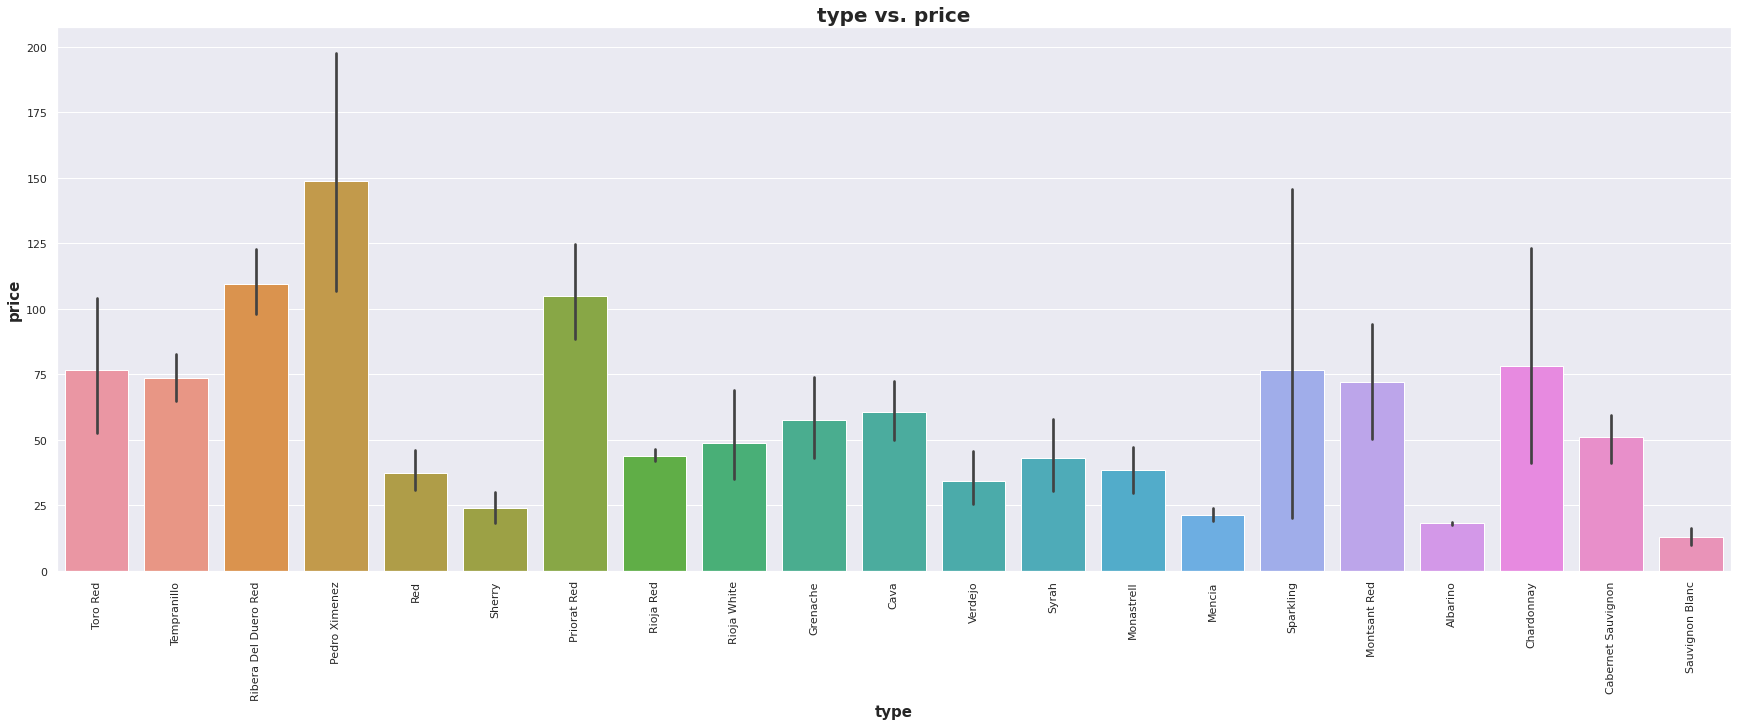

In [ ]:
# type
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='type', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('type vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# This bar plot is comparing different types of win, the most expensive one is Pedro Ximenes.

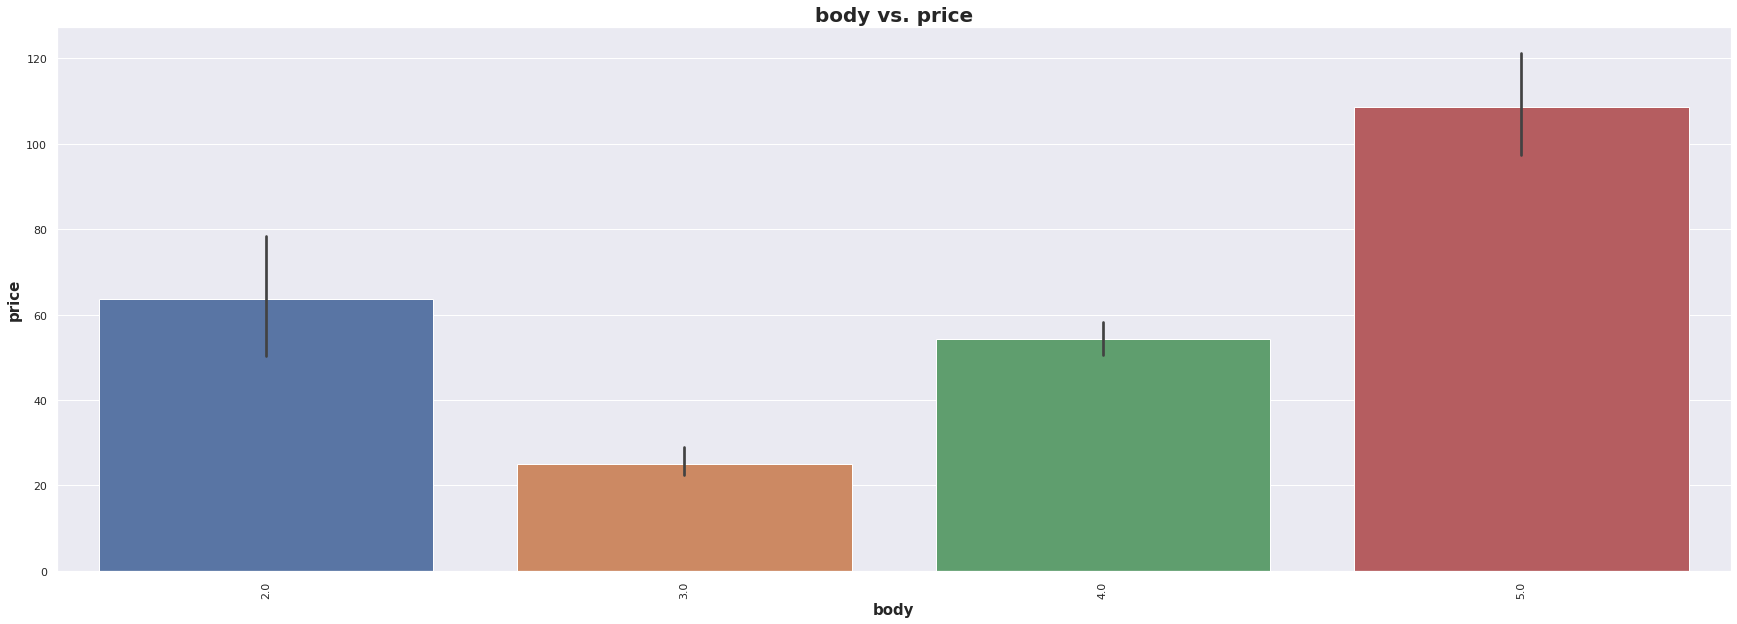

In [ ]:
#body
fig, ax = plt.subplots(figsize=(30,10))

ax = sns.barplot(data=df,x='body', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('body vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('body', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# Based on the bar plot, rate 5 is the most expensive one, since it so delicious and hepful for the body

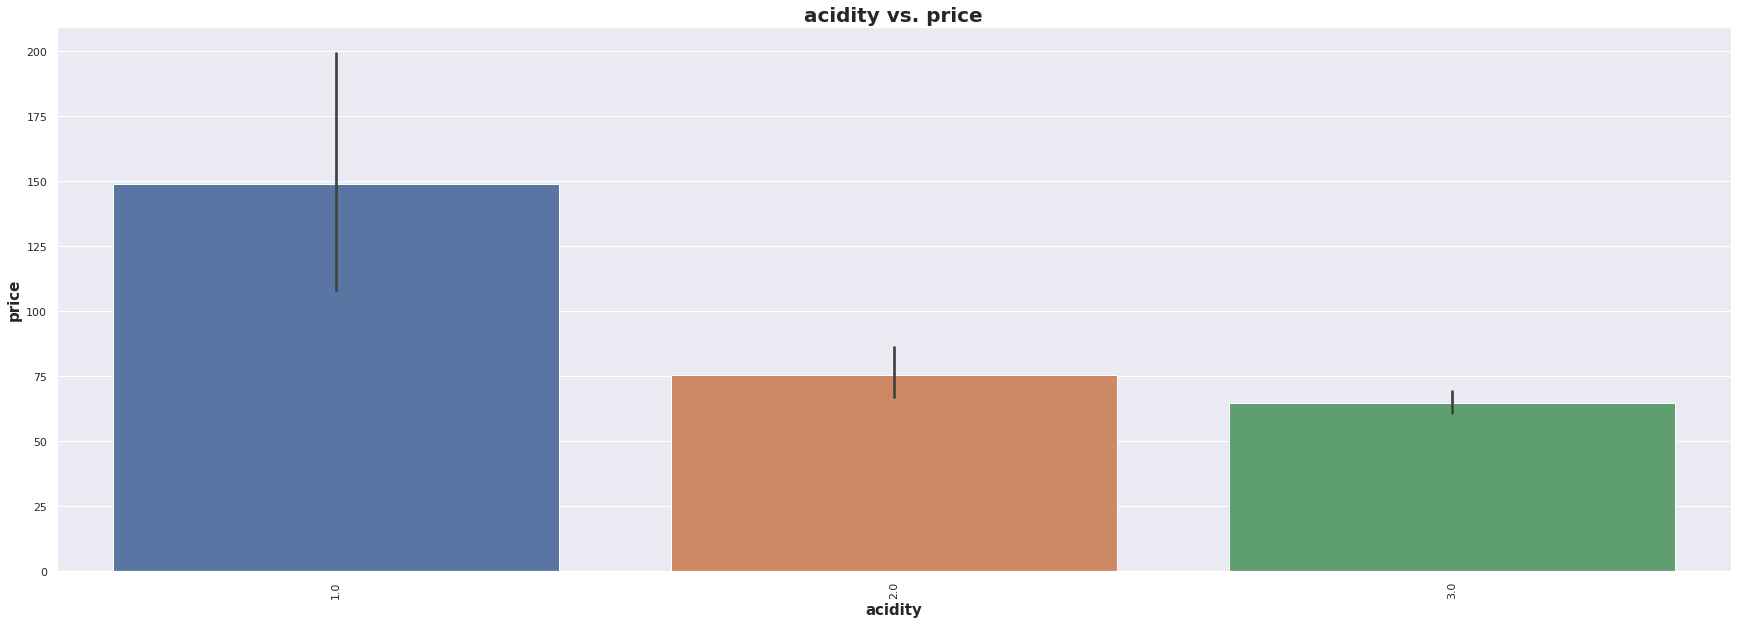

In [ ]:
#acidity
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(data=df,x='acidity', y = 'price')
plt.xticks(rotation = 90)
ax.set_title('acidity vs. price', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('acidity', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('price', fontsize = 15, fontweight = 'bold');

In [ ]:
# Based on this graph I have to say the less acidity is most expensive because it is more sweeter

In [ ]:
ml_df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'region', 'price',
       'type', 'body', 'acidity'],
      dtype='object')

In [ ]:
ml_df.columns.unique()

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'region', 'price',
       'type', 'body', 'acidity'],
      dtype='object')

#Identified outliers

In [ ]:
# In the bar plot, we could recognize different ratings in addition with the prices in the list.
# Moreover, We could see the distubation between price and rating.
# the 4.6 rate has the expensive and then 4.7, through all rating.

#Clearly commented all of your cleaning steps and described any decisions you made.

In [ ]:
# Fist, I droped the unneccasy column which was the country, since we knew it is about spanish wine 
# Second, i check the duplicated values and the missing value. 
# Third, I check for Inconsistencies, in order to see any misspellings or abbreviations.